In [ ]:
pip install pandas numpy matplotlib seaborn xgboost streamlit mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.0/677.0 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/6

In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
train.drop(columns = ["Policy Start Date"], inplace = True)
train.drop(columns = ["id"], inplace = True)
train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,Poor,Yes,Weekly,House,2022.0


In [ ]:
import pandas as pd

train['Age group'] = pd.cut(
    train['Age'],
    bins=[0, 18, 30, 45, 60],
    labels=["<18", "18-30", "30-45", "45-60"],
    right=False  # Optional: to control whether upper bound is inclusive
)
train['Income_Bracket'] = pd.cut(
    train['Annual Income'],
    bins=[0, 30000, 60000, 100000, 130000, 160000],
    labels=['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High']
)
train['Health Level'] = pd.cut(
    train['Health Score'],
    bins=[0, 15, 30, 45, 60],
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)
train['credit category'] = pd.cut(
    train['Credit Score'],
    bins=[300, 450, 600, 750, 850, 900],
    labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
)
train['insurance item'] = pd.cut(
    train['Insurance Duration'],
    bins=[0,1,2,3,4],
    labels=["<1yr","1-2yrs","2-3yrs","3-4yrs"]
    )
train['Vehicle Type'] = pd.cut(
    train['Vehicle Age'],
    bins=[0,2,5,10,20],
    labels=["new","moderate","old","very old"]
    )


train.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Smoking Status,Exercise Frequency,Property Type,Premium Amount,Age group,Income_Bracket,Health Level,credit category,insurance item,Vehicle Type
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,No,Weekly,House,2869.0,18-30,Low,Fair,Poor,NaN,very old
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,...,Yes,Monthly,House,1483.0,30-45,Lower-Mid,Fair,Good,1-2yrs,very old
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,Yes,Weekly,House,567.0,18-30,Low,Excellent,NaN,2-3yrs,very old
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,...,Yes,Daily,Apartment,765.0,18-30,High,Poor,Poor,<1yr,NaN
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,Yes,Weekly,House,2022.0,18-30,Lower-Mid,Fair,Fair,3-4yrs,old


In [ ]:
# 1. Income per dependent
train['Income_per_Dependent'] = train['Annual Income'] / (train['Number of Dependents'] + 1)

# 2. Income per age (to normalize high earners by age)
train['Income_per_Age'] = train['Annual Income'] / (train['Age'] + 1)

# 3. Is young high earner (binary flag)
train['Is_Young_High_Earner'] = ((train['Age'] < 30) & (train['Annual Income'] > 75000)).astype(int)

# 4. Credit-to-Age Ratio
train['Credit_per_Age'] = train['Credit Score'] / (train['Age'] + 1)


In [ ]:
train.shape

(58797, 29)

In [ ]:
train.dtypes

,0
Age,float64
Gender,object
Annual Income,float64
Marital Status,object
Number of Dependents,float64
Education Level,object
Occupation,object
Health Score,float64
Location,object
Policy Type,object


In [ ]:
train.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Income_per_Dependent,Income_per_Age,Is_Young_High_Earner,Credit_per_Age
count,57910.000000,56531.000000,53458.000000,55274.000000,40954.000000,58794.000000,51941.000000,58796.000000,58796.000000,51370.000000,55676.000000,58797.000000,51154.000000
mean,41.245433,32886.858449,2.006229,25.645624,1.003760,9.594533,592.179588,5.016413,1104.859820,14950.002458,878.429185,0.026056,15.832242
std,13.550484,32206.236062,1.417325,12.204467,0.980874,5.774717,149.653467,2.599545,867.762563,19824.901402,977.781476,0.159302,7.320181
min,18.000000,17.000000,0.000000,2.068843,0.000000,0.000000,300.000000,1.000000,20.000000,3.400000,0.261538,0.000000,4.615385
25%,30.000000,8072.000000,1.000000,15.929245,0.000000,5.000000,468.000000,3.000000,514.000000,3014.762500,204.323488,0.000000,10.522727
50%,41.000000,23981.000000,2.000000,24.624036,1.000000,10.000000,594.000000,5.000000,872.000000,8117.000000,568.223214,0.000000,14.000000
75%,53.000000,44715.000000,3.000000,34.573269,2.000000,15.000000,719.000000,7.000000,1511.000000,18637.583333,1175.882955,0.000000,19.482439
max,64.000000,149995.000000,4.000000,58.886035,7.000000,19.000000,849.000000,9.000000,4984.000000,149966.000000,7863.105263,1.000000,44.684211


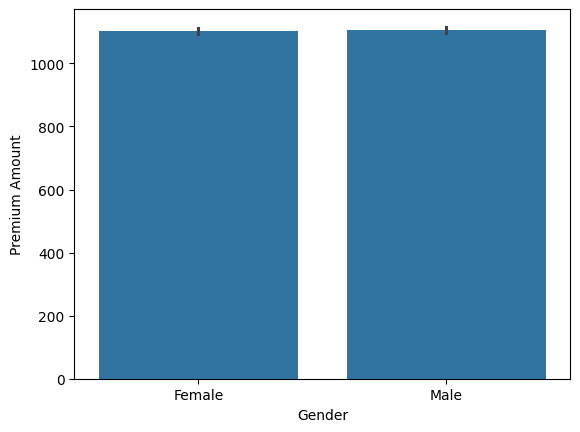

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Gender", y="Premium Amount", data=train)
plt.show()

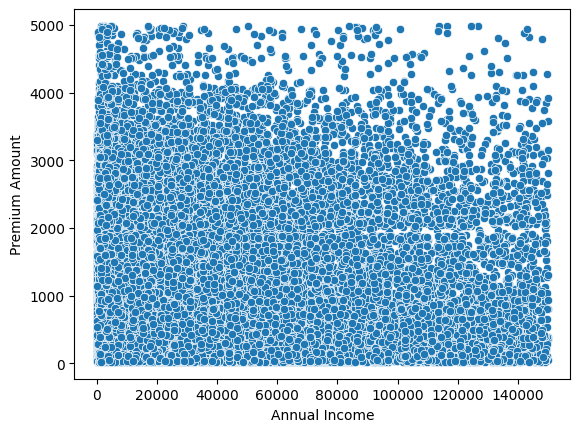

In [ ]:
sns.scatterplot(x='Annual Income', y='Premium Amount', data= train)
plt.show()

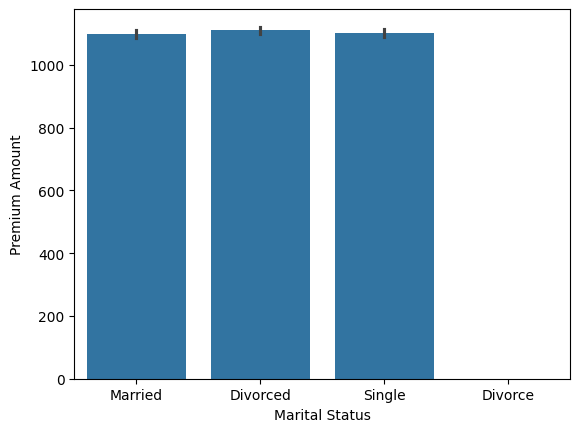

In [ ]:
sns.barplot(x="Marital Status", y="Premium Amount", data=train)
plt.show()

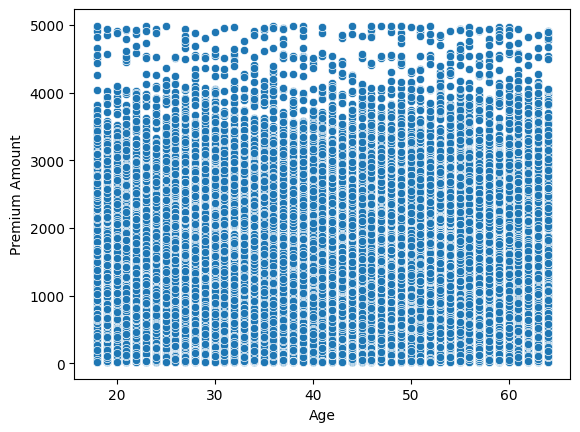

In [ ]:

sns.scatterplot(x='Age', y='Premium Amount', data= train)
plt.show()

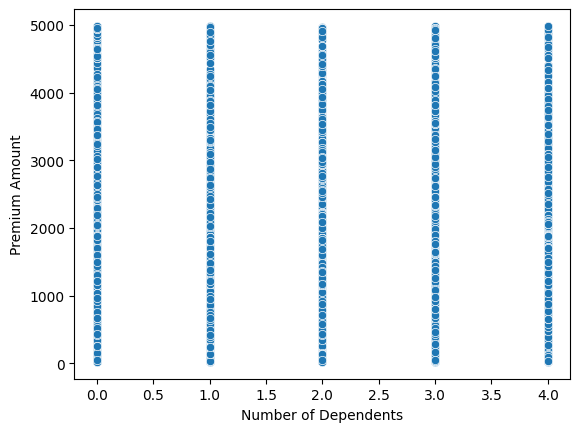

In [ ]:
sns.scatterplot(x="Number of Dependents", y="Premium Amount", data= train)
plt.show()

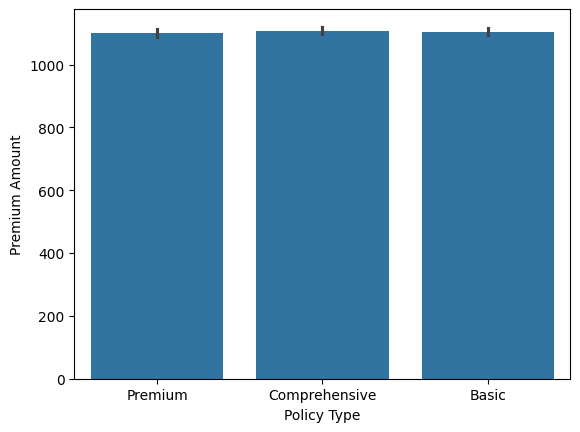

In [ ]:
sns.barplot(x="Policy Type", y="Premium Amount", data= train)
plt.show()

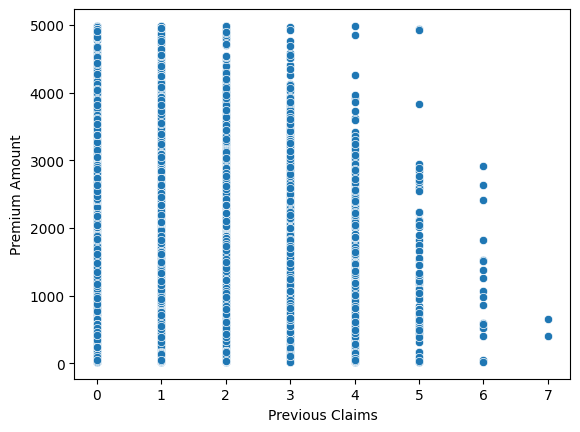

In [ ]:
sns.scatterplot(x='Previous Claims', y='Premium Amount', data=train)
plt.show()

/tmp/ipython-input-15-92768392.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('credit score status')['Premium Amount'].mean().plot(kind='line', title='Average Premium by Credit Score Status')


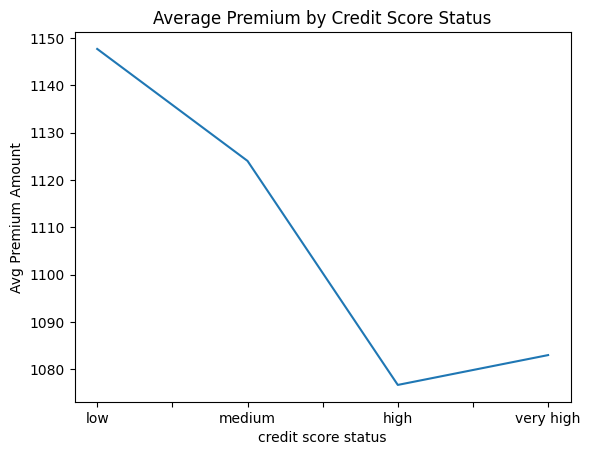

In [ ]:
train["credit score status"] = pd.qcut(train["Credit Score"], q = 4, labels=["low", "medium", "high", "very high"])
train.groupby('credit score status')['Premium Amount'].mean().plot(kind='line', title='Average Premium by Credit Score Status')
plt.ylabel('Avg Premium Amount')
plt.show()

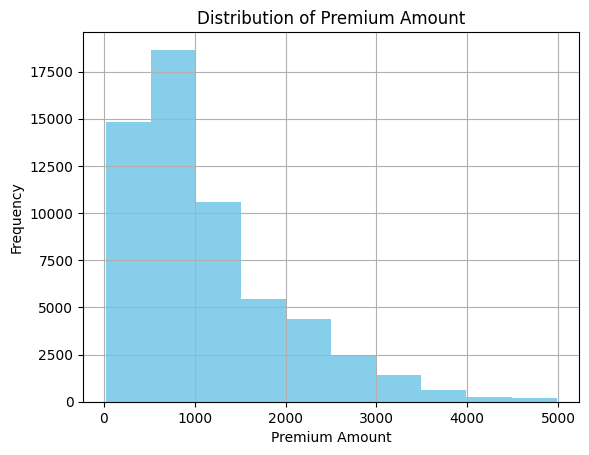

In [ ]:
import matplotlib.pyplot as plt
train["Premium Amount"].hist(bins=10, color='skyblue')
plt.xlabel('Premium Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Premium Amount')
plt.show()

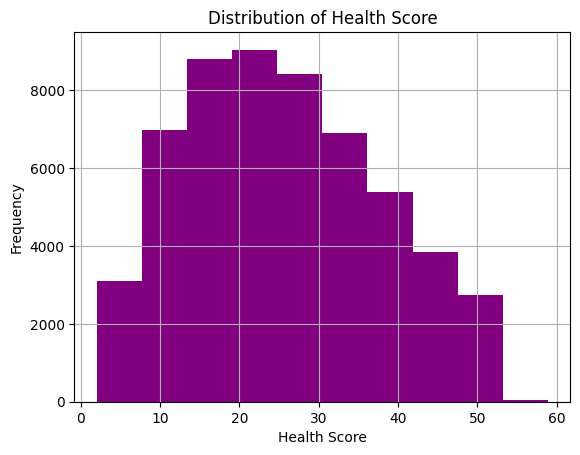

In [ ]:
train['Health Score'].hist(bins=10, color='purple')
plt.xlabel('Health Score')
plt.ylabel('Frequency')
plt.title('Distribution of Health Score')
plt.show()

In [ ]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
train[num_cols] = train[num_cols].fillna(train[num_cols].median())


In [ ]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)


Index(['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Income_per_Dependent', 'Income_per_Age',
       'Is_Young_High_Earner', 'Credit_per_Age'],
      dtype='object')


In [ ]:
# Define categorical columns before one-hot encoding
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type', 'Age group', 'Income_Bracket',
       'Health Level', 'credit category', 'insurance item', 'Vehicle Type',
       'credit score status'],
      dtype='object')


In [ ]:
cat_cols = train.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode().iloc[0])

In [ ]:
train = pd.get_dummies(train, columns=cat_cols)


In [ ]:
train.dtypes

,0
Age,float64
Annual Income,float64
Number of Dependents,float64
Health Score,float64
Previous Claims,float64
...,...
Vehicle Type_very old,bool
credit score status_low,bool
credit score status_medium,bool
credit score status_high,bool


In [ ]:
x = train.drop(columns = ["Premium Amount"], axis = 1)
y = train["Premium Amount"]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Check outliers before removal
for col in numerical_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


Age: 0 outliers
Annual Income: 3510 outliers
Number of Dependents: 0 outliers
Health Score: 0 outliers
Previous Claims: 3088 outliers
Vehicle Age: 0 outliers
Credit Score: 0 outliers
Insurance Duration: 0 outliers
Premium Amount: 2454 outliers
Income_per_Dependent: 5206 outliers
Income_per_Age: 3845 outliers
Is_Young_High_Earner: 1532 outliers
Credit_per_Age: 3379 outliers


In [ ]:
# Remove outliers for original features
for col in numerical_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]


In [ ]:
# Feature engineering
train['Income_per_Dependent'] = train['Annual Income'] / (train['Number of Dependents'] + 1)
train['Income_per_Age'] = train['Annual Income'] / (train['Age'] + 1)
train['Is_Young_High_Earner'] = ((train['Age'] < 30) & (train['Annual Income'] > 75000)).astype(int)
train['Credit_per_Age'] = train['Credit Score'] / (train['Age'] + 1)


In [ ]:
# Remove outliers from new features
new_features = ['Income_per_Dependent', 'Income_per_Age', 'Credit_per_Age']
for col in new_features:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]


In [ ]:
# Recreate DataFrames with column names if x_test is currently an array
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)



In [ ]:
# 1. Income per dependent (avoids division by zero by adding 1)
x_train['Income_per_Dependent'] = x_train['Annual Income'] / (x_train['Number of Dependents'] + 1)
x_test['Income_per_Dependent'] = x_test['Annual Income'] / (x_test['Number of Dependents'] + 1)

# 2. Income per age
x_train['Income_per_Age'] = x_train['Annual Income'] / (x_train['Age'] + 1)
x_test['Income_per_Age'] = x_test['Annual Income'] / (x_test['Age'] + 1)

# 3. Binary feature: young high earner
x_train['Is_Young_High_Earner'] = ((x_train['Age'] < 30) & (x_train['Annual Income'] > 75000)).astype(int)
x_test['Is_Young_High_Earner'] = ((x_test['Age'] < 30) & (x_test['Annual Income'] > 75000)).astype(int)

# 4. Credit score per age
x_train['Credit_per_Age'] = x_train['Credit Score'] / (x_train['Age'] + 1)
x_test['Credit_per_Age'] = x_test['Credit Score'] / (x_test['Age'] + 1)


In [ ]:
# Drop weak features (based on importance plot)
low_impact_cols = [
    'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single',
    "Education Level_Bachelor's", 'Education Level_High School', "Education Level_Master's", 'Education Level_PhD',
    'Occupation_Employed', 'Occupation_Self-Employed', 'Occupation_Unemployed',
    'Location_Rural', 'Location_Suburban', 'Location_Urban',
    'Policy Type_Basic', 'Policy Type_Comprehensive', 'Policy Type_Premium',
    'Customer Feedback_Average', 'Customer Feedback_Good', 'Customer Feedback_Poor',
    'Smoking Status_No', 'Smoking Status_Yes',
    'Exercise Frequency_Daily', 'Exercise Frequency_Monthly', 'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
    'Property Type_Apartment', 'Property Type_Condo', 'Property Type_House',
    # You can skip dropping age groups, bracketed features if unsure.
]

# Convert back to DataFrame before dropping columns
x_train = pd.DataFrame(x_train, columns=x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

x_train = x_train.drop(columns=low_impact_cols, errors='ignore')
x_test = x_test.drop(columns=low_impact_cols, errors='ignore')

In [ ]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [ ]:
from xgboost import XGBRegressor
import re

def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', col)  # Remove invalid characters
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Clean column names before fitting the model
x_train_cleaned = clean_col_names(pd.DataFrame(x_train, columns=x.columns))
x_test_cleaned = clean_col_names(pd.DataFrame(x_test, columns=x.columns))

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(x_train_cleaned, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np


In [ ]:
def evaluate_model(model, x_test, y_test, name = "Model"):
    y_pred = model.predict(x_test)
    rsme = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Performance: ")
    print(f"RSME {rsme: 2f}")
    print(f"MAE {mae: 2f}")
    print(f"R2 {r2: 2f}")

    return {"Model": name, "RSME": rsme, "MAE": mae, "R2": r2}



In [ ]:
results = []
results.append(evaluate_model(model_linear, x_test, y_test, name = "Linear Regression"))
results.append(evaluate_model(model_tree, x_test, y_test, name = "Decision Tree"))
results.append(evaluate_model(model_rf, x_test, y_test, name = "Random Forest"))
results.append(evaluate_model(model_xgb, x_test_cleaned, y_test, name = "XGBoost"))

Linear Regression Performance: 
RSME  863.652557
MAE  666.060887
R2  0.004908
Decision Tree Performance: 
RSME  1235.190152
MAE  901.761054
R2 -1.035413
Random Forest Performance: 
RSME  855.321248
MAE  655.564109
R2  0.024014
XGBoost Performance: 
RSME  870.389188
MAE  661.907386
R2 -0.010676


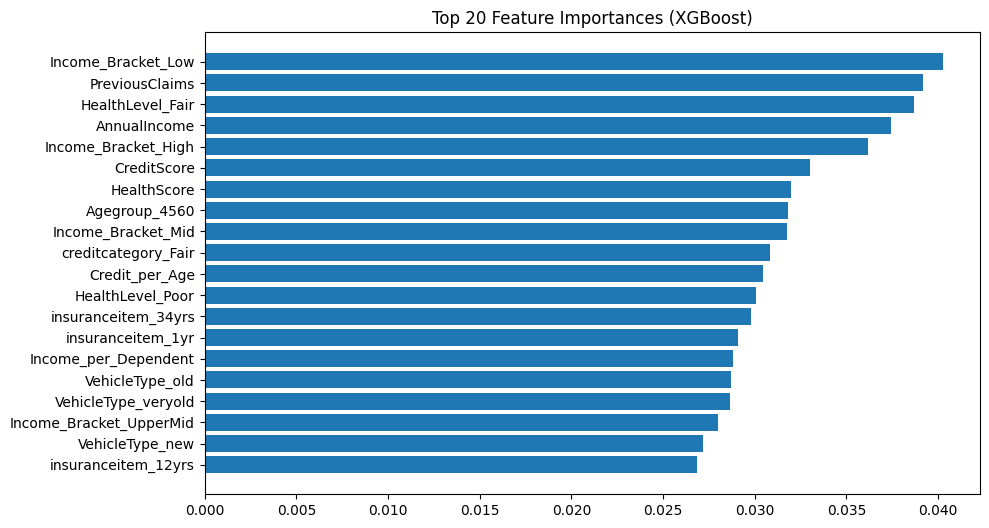

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# After fitting your XGBoost model
importances = model_xgb.feature_importances_
feature_names = x_train_cleaned.columns # Use cleaned column names

# Sort and display top 20
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:20], feat_imp_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import re

# Define the clean_col_names function if it's not already defined in this cell
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', col)  # Remove invalid characters
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Before model training
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Clean column names before fitting the model
x_train_cleaned = clean_col_names(pd.DataFrame(x_train, columns=x.columns))
x_test_cleaned = clean_col_names(pd.DataFrame(x_test, columns=x.columns))


# Use one of the trained models, e.g., model_xgb
model_xgb.fit(x_train_cleaned, y_train_log)
y_pred_log = model_xgb.predict(x_test_cleaned)

# Inverse the log prediction
y_pred = np.expm1(y_pred_log)

# Then calculate metrics on original scale

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import scipy.stats as stats
import pandas as pd
import re

def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', col)
        new_cols.append(new_col)
    df.columns = new_cols
    return df


xgb = XGBRegressor()

param_dist = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=10,  # Only try 10 random combinations
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

x_train_cleaned = clean_col_names(pd.DataFrame(x_train, columns=x.columns))

random_search.fit(x_train_cleaned, y_train)
best_model = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pandas as pd
import re

# Define the clean_col_names function if it's not already defined in this cell
def clean_col_names(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_col = re.sub(r'[^A-Za-z0-9_]+', '', col)  # Remove invalid characters
        new_cols.append(new_col)
    df.columns = new_cols
    return df

# Ensure x_train and x_test are DataFrames with original column names before cleaning
x_train_orig = pd.DataFrame(x_train, columns=x.columns)
x_test_orig = pd.DataFrame(x_test, columns=x.columns)

# Apply column cleaning to both training and testing data
x_train_cleaned = clean_col_names(x_train_orig.copy())
x_test_cleaned = clean_col_names(x_test_orig.copy())


# Retrain models on the cleaned data
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(x_train_cleaned, y_train)

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(x_train_cleaned, y_train)

# Make predictions using the models trained on cleaned data
final_pred = (model_rf.predict(x_test_cleaned) + model_xgb.predict(x_test_cleaned)) / 2

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate final predictions
rmse = np.sqrt(mean_squared_error(y_test, final_pred))
mae = mean_absolute_error(y_test, final_pred)
r2 = r2_score(y_test, final_pred)

print("Final Ensemble Model Performance:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


Final Ensemble Model Performance:
RMSE: 855.9457733731598
MAE: 654.4309433014146
R2: 0.022588451748742355


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import pandas as pd

# Assuming you have:
# - x_train, x_test, y_train, y_test

# Convert x_train and x_test back to DataFrames to work with column names
# Use the columns from the original 'x' DataFrame as a reference for column names
x_train_df = pd.DataFrame(x_train, columns=x.columns)
x_test_df = pd.DataFrame(x_test, columns=x.columns)

# Identify numerical and categorical columns from the DataFrames *after* feature selection
numerical_cols_post_selection = x_train_df.select_dtypes(include=['float64', 'int64']).columns
encoded_categorical_cols_post_selection = x_train_df.select_dtypes(include=['bool']).columns # Assuming one-hot encoded are boolean


# 1. Define Preprocessing for Numerical and Categorical
# Numerical columns are already scaled, so we just need imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    # Scaling is already done, so no StandardScaler here
])

# Categorical columns are already one-hot encoded, so we just need imputation and passthrough
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', 'passthrough')  # Already one-hot encoded
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols_post_selection),
        ('cat', categorical_transformer, encoded_categorical_cols_post_selection)
    ],
    remainder='passthrough' # Keep any other columns (like engineered features that are not float/int/bool)
)

# 2. Define Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, max_depth=5, random_state=42))
])


# 3. Train Model
model.fit(x_train_df, y_train)

# 4. Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(x_test_df)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Marital Status_Divorced' 'Marital Status_Married'
 'Marital Status_Single' "Education Level_Bachelor's"
 'Education Level_High School' "Education Level_Master's"
 'Education Level_PhD' 'Occupation_Employed' 'Occupation_Self-Employed'
 'Occupation_Unemployed' 'Location_Rural' 'Location_Suburban'
 'Location_Urban' 'Policy Type_Basic' 'Policy Type_Comprehensive'
 'Policy Type_Premium' 'Customer Feedback_Average'
 'Customer Feedback_Good' 'Customer Feedback_Poor' 'Smoking Status_No'
 'Smoking Status_Yes' 'Exercise Frequency_Daily'
 'Exercise Frequency_Monthly' 'Exercise Frequency_Rarely'
 'Exercise Frequency_Weekly' 'Property Type_Apartment'
 'Property Type_Condo' 'Property Type_House']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


RMSE: 861.7652863489574
MAE: 659.1031135851023
R2: 0.00925257063250673


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Marital Status_Divorced' 'Marital Status_Married'
 'Marital Status_Single' "Education Level_Bachelor's"
 'Education Level_High School' "Education Level_Master's"
 'Education Level_PhD' 'Occupation_Employed' 'Occupation_Self-Employed'
 'Occupation_Unemployed' 'Location_Rural' 'Location_Suburban'
 'Location_Urban' 'Policy Type_Basic' 'Policy Type_Comprehensive'
 'Policy Type_Premium' 'Customer Feedback_Average'
 'Customer Feedback_Good' 'Customer Feedback_Poor' 'Smoking Status_No'
 'Smoking Status_Yes' 'Exercise Frequency_Daily'
 'Exercise Frequency_Monthly' 'Exercise Frequency_Rarely'
 'Exercise Frequency_Weekly' 'Property Type_Apartment'
 'Property Type_Condo' 'Property Type_House']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [ ]:
# 1. Install MLflow and pyngrok if not installed
!pip install mlflow pyngrok

# 2. Import libraries
import subprocess
import threading
import time
from pyngrok import ngrok

# 3. Set your ngrok auth token here (🔴 Replace with your actual token)
ngrok.set_auth_token("30KwR5ga0Vn9OtYNtI04zeZnnVL_6MiSjKv2387sQbijjpHSS")  # 👈 paste token here

# 4. Start MLflow UI in background
mlflow_port = 5000  # Use 5000 or any other available port

def run_mlflow():
    cmd = ["mlflow", "ui", "--port", str(mlflow_port)]
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

# 5. Start MLflow in a new thread
mlflow_thread = threading.Thread(target=run_mlflow)
mlflow_thread.daemon = True
mlflow_thread.start()

# 6. Wait for MLflow to start
time.sleep(5)

# 7. Create public URL using ngrok
try:
    public_url = ngrok.connect(mlflow_port)
    print(f"✅ MLflow UI is running at: {public_url}")
except Exception as e:
    print(f"❌ Could not connect to ngrok. Error: {e}")


✅ MLflow UI is running at: NgrokTunnel: "https://025add488fd7.ngrok-free.app" -> "http://localhost:5000"


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Re-split the data
x = train.drop(columns=["Premium Amount"])
y = train["Premium Amount"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Column types
numerical_cols = x_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Pipeline with model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, max_depth=5, random_state=42))
])

# ✅ Update this to your ngrok MLflow link:
mlflow.set_tracking_uri("http://localhost:5000")  # replace with actual URL

mlflow.set_experiment("SmartPremium")

# MLflow tracking
with mlflow.start_run():
    # Train
    model_pipeline.fit(x_train, y_train)
    y_pred = model_pipeline.predict(x_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    from mlflow.models.signature import infer_signature
    signature = infer_signature(x_train, model_pipeline.predict(x_train))

    # ✅ Log model with signature
    mlflow.sklearn.log_model(
        sk_model=model_pipeline,
        artifact_path="premium_prediction_model",
        signature=signature
    )

    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

    # Parameters
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 5)

    print("✅ MLflow run completed.")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2: {r2:.2f}")


2025/07/28 07:21:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ MLflow run completed.
RMSE: 681.01
MAE: 539.02
R2: -0.01
🏃 View run handsome-hare-31 at: http://localhost:5000/#/experiments/807952785529856844/runs/a327facbaa974163a9c1c73d3c7780cd
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


In [ ]:
# 1. Import and preprocess data
# 2. Define preprocessor
# 3. Train initial model (optional)
# 4. Setup MLflow
import numpy as np

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("SmartPremium")

# ✅ 5. Now paste and run this tuning loop at the end:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

for n in [100,200,300,500]:
    with mlflow.start_run(run_name=f"XGB_{n}_trees"):
        model = XGBRegressor( n_estimators=n,
    max_depth=3 or 4,
    learning_rate=0.1 or 0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("regressor", model)
        ])
        pipeline.fit(x_train, y_train)
        preds = pipeline.predict(x_test)


        rmse = np.sqrt(mean_squared_error(y_test, preds))
        mae = mean_absolute_error(y_test, preds)

        r2 = r2_score(y_test, preds)

        mlflow.log_param("n_estimators", n)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)
        mlflow.sklearn.log_model(pipeline, "xgb_model")


2025/07/28 07:21:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/28 07:21:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB_100_trees at: http://localhost:5000/#/experiments/807952785529856844/runs/15131450909a4070b0fdf78a1837cda3
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


2025/07/28 07:22:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/28 07:22:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB_200_trees at: http://localhost:5000/#/experiments/807952785529856844/runs/179488118cdb46bab0a6522e845c2aa9
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


2025/07/28 07:22:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/28 07:22:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB_300_trees at: http://localhost:5000/#/experiments/807952785529856844/runs/d9f72ed399054d03a496344d1b8aa048
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


2025/07/28 07:22:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/28 07:22:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB_500_trees at: http://localhost:5000/#/experiments/807952785529856844/runs/76fdabc9d671425b8235cee2f0a95c4b
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

# === 1. Load and Prepare Data ===
data = pd.read_csv("train.csv")  # Change to your CSV file

# Impute missing values in the target variable
imputer = SimpleImputer(strategy='median')
data['Premium Amount'] = imputer.fit_transform(data[['Premium Amount']])

# Target
y = data['Premium Amount']
X = data.drop(columns='Premium Amount')

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Preprocessing ===
numeric_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numeric_features),
    ("cat", Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))]), categorical_features)
])


# === 3. MLflow setup ===
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("SmartPremium")

# === 4. Train & Track with MLflow ===
with mlflow.start_run(run_name="XGB_100_Clean"):
    model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    pipeline.fit(x_train, y_train)
    preds = pipeline.predict(x_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    # Log
    mlflow.log_param("model", "XGBRegressor")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 5)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

    # Log input example and signature
    input_example = x_test.iloc[:1]
    mlflow.sklearn.log_model(pipeline, "model",
                             input_example=input_example)

    print("✅ MLflow run completed.")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2: {r2:.4f}")

2025/07/28 07:23:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ MLflow run completed.
RMSE: 851.08
MAE: 653.00
R2: 0.0307
🏃 View run XGB_100_Clean at: http://localhost:5000/#/experiments/807952785529856844/runs/fb69cb40bc4e4c708793547dbdd6947b
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


The code above defines a pipeline that handles the preprocessing (imputation, scaling, one-hot encoding) and the XGBoost model training. It then trains this pipeline on the `x_train` data and logs the model and metrics to MLflow. Remember to run the cell that starts the MLflow UI (`RaYS-DWVU7Ac`) before running this cell to view the logged runs.

In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from mlflow.models.signature import infer_signature
import warnings
warnings.filterwarnings("ignore")

# === 1. Load and Prepare Data ===
data = pd.read_csv("train.csv")

# Drop irrelevant columns if present
cols_to_drop = ['id', 'Patient ID', 'Policy ID', 'Policy Start Date'] # Added Policy Start Date back for consistency
data = data.drop(columns=[col for col in cols_to_drop if col in data.columns])

# Ensure 'smoker' column exists (using 'Smoking Status' from the dataset)
if 'smoker' not in data.columns and 'Smoking Status' in data.columns:
    data['smoker'] = data['Smoking Status'].apply(lambda x: 'yes' if x == 'Yes' else 'no')
elif 'smoker' not in data.columns: # If 'Smoking Status' is also missing, create a random 'smoker' column
    data['smoker'] = np.random.choice(['yes', 'no'], size=len(data))


# Impute missing values in the target variable before feature engineering
imputer = SimpleImputer(strategy='median')
data['Premium Amount'] = imputer.fit_transform(data[['Premium Amount']])

# Apply log transform to the target variable
data['Premium Amount'] = np.log1p(data['Premium Amount'])


# === 2. Feature Engineering ===
# Only create features if base columns exist
if "Age" in data.columns and "smoker" in data.columns:
    data["age_smoker"] = data["Age"] * (data["smoker"] == "yes").astype(int)

if "Number of Children" in data.columns and "Age" in data.columns:
    data["children_per_age"] = data["Number of Children"] / (data["Age"] + 1)


# === 3. Define Target and Features ===
y = data['Premium Amount'] # Now log-transformed and imputed
X = data.drop(columns='Premium Amount')

# Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# === 4. Preprocessing Pipelines ===
numerical_features = x_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object', 'category']).columns.tolist() # Include 'category' as some created features might be categories

# Ensure no overlap between numerical and categorical lists after selecting dtypes
common_cols = list(set(numerical_features) & set(categorical_features))
if common_cols:
    print(f"Warning: Columns appear in both numerical and categorical lists: {common_cols}")
    # Decide how to handle - here we prioritize numerical if it's a number
    for col in common_cols:
        if col in categorical_features:
            categorical_features.remove(col)


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Added imputer here as well to catch any NaNs introduced by feature engineering
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Added imputer
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # Explicitly drop other columns
)

# === 5. MLflow Setup ===
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("SmartPremium")

# === 6. Define Models ===
models = {
    "XGB_100": XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "XGB_500_lr0.05": XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05, random_state=42),
    "RF_200": RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42),
    "Linear": LinearRegression()
}

# === 7. Model Training & MLflow Logging ===
for name, model in models.items():
    with mlflow.start_run(run_name=name) as run:
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("regressor", model)
        ])
        pipeline.fit(x_train, y_train)
        preds = pipeline.predict(x_test)

        # Undo log transform for evaluation metrics
        y_test_orig = np.expm1(y_test)
        preds_orig = np.expm1(preds)

        rmse = np.sqrt(mean_squared_error(y_test_orig, preds_orig))
        mae = mean_absolute_error(y_test_orig, preds_orig)
        r2 = r2_score(y_test_orig, preds_orig)

        mlflow.log_param("model", name)
        if hasattr(model, 'n_estimators'):
            mlflow.log_param("n_estimators", model.n_estimators)
        if hasattr(model, 'max_depth'): # Log max_depth as well
            mlflow.log_param("max_depth", model.max_depth)


        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("r2", r2)

        # Log model with signature and example
        input_example = x_test.iloc[:1]
        signature = infer_signature(x_test, preds)
        mlflow.sklearn.log_model(pipeline, "model", input_example=input_example, signature=signature)

        print(f"✅ Run: {name} | RMSE={rmse:.2f} | MAE={mae:.2f} | R²={r2:.4f}")

        # Optional: register best model manually from UI or use below line with run.info.run_id
        # mlflow.register_model(f"runs:/{run.info.run_id}/model", "SmartPremiumBestModel")

print("\n✅ All model runs completed.")

2025/07/28 07:24:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Run: XGB_100 | RMSE=929.00 | MAE=624.72 | R²=-0.1549
🏃 View run XGB_100 at: http://localhost:5000/#/experiments/807952785529856844/runs/9eb0558849da4670af358f38d76a5347
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


2025/07/28 07:26:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Run: XGB_500_lr0.05 | RMSE=928.10 | MAE=624.15 | R²=-0.1527
🏃 View run XGB_500_lr0.05 at: http://localhost:5000/#/experiments/807952785529856844/runs/e5c7014e65c94e98a34f39df4beb0e9e
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


2025/07/28 07:49:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Run: RF_200 | RMSE=929.73 | MAE=626.88 | R²=-0.1567
🏃 View run RF_200 at: http://localhost:5000/#/experiments/807952785529856844/runs/d5c001bb2a534186a33680e574c5c68f
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844


2025/07/28 07:49:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Run: Linear | RMSE=940.26 | MAE=648.41 | R²=-0.1831
🏃 View run Linear at: http://localhost:5000/#/experiments/807952785529856844/runs/3d8d9b744257492baff06400b3e4caf6
🧪 View experiment at: http://localhost:5000/#/experiments/807952785529856844

✅ All model runs completed.


In [ ]:
# Install necessary libraries
!pip install -q streamlit pyngrok

# --- 1. Set your new ngrok auth token ---
from pyngrok import ngrok

# Replace with your new ngrok token (from https://dashboard.ngrok.com/tunnels/authtokens)
ngrok.set_auth_token("30KwR5ga0Vn9OtYNtI04zeZnnVL_6MiSjKv2387sQbijjpHSS")


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import mlflow.pyfunc

# Load model
model = mlflow.pyfunc.load_model("runs:/fb69cb40bc4e4c708793547dbdd6947b/model")

# Input form
st.title("Insurance Premium Predictor")

id = st.number_input("ID", value=1)
age = st.slider("Age", 18, 80, 30)
gender = st.selectbox("Gender", ["Male", "Female"])
annual_income = st.number_input("Annual Income", value=500000.0)
marital_status = st.selectbox("Marital Status", ["Single", "Married"])
dependents = st.number_input("Number of Dependents", value=0)
education = st.selectbox("Education Level", ["Graduate", "High School"])
occupation = st.selectbox("Occupation", ["Salaried", "Self-Employed"])
health_score = st.slider("Health Score", 0, 100, 75)
location = st.selectbox("Location", ["North", "South", "East", "West"])
policy_type = st.selectbox("Policy Type", ["Basic", "Comprehensive"])
previous_claims = st.number_input("Previous Claims", value=0)
vehicle_age = st.number_input("Vehicle Age (years)", value=2)
credit_score = st.number_input("Credit Score", value=700)
insurance_duration = st.number_input("Insurance Duration (years)", value=5)
policy_start_date = st.text_input("Policy Start Date (YYYY-MM-DD)", value="2020-01-01")
feedback = st.selectbox("Customer Feedback", ["Good", "Average", "Poor"])
smoking = st.selectbox("Smoking Status", ["yes", "no"])
exercise = st.selectbox("Exercise Frequency", ["Daily", "Occasionally", "Never"])
property_type = st.selectbox("Property Type", ["House", "Apartment"])

# Create DataFrame
input_df = pd.DataFrame([{
    "id": id,
    "Age": age,
    "Gender": gender,
    "Annual Income": annual_income,
    "Marital Status": marital_status,
    "Number of Dependents": dependents,
    "Education Level": education,
    "Occupation": occupation,
    "Health Score": health_score,
    "Location": location,
    "Policy Type": policy_type,
    "Previous Claims": previous_claims,
    "Vehicle Age": vehicle_age,
    "Credit Score": credit_score,
    "Insurance Duration": insurance_duration,
    "Policy Start Date": policy_start_date,
    "Customer Feedback": feedback,
    "Smoking Status": smoking,
    "Exercise Frequency": exercise,
    "Property Type": property_type
}])
# Convert input_df types to match MLflow model's expected schema
input_df["id"] = input_df["id"].astype(int)
input_df["Age"] = input_df["Age"].astype(float)
input_df["Annual Income"] = input_df["Annual Income"].astype(float)
input_df["Number of Dependents"] = input_df["Number of Dependents"].astype(float)
input_df["Health Score"] = input_df["Health Score"].astype(float)
input_df["Previous Claims"] = input_df["Previous Claims"].astype(float)
input_df["Vehicle Age"] = input_df["Vehicle Age"].astype(float)
input_df["Credit Score"] = input_df["Credit Score"].astype(float)
input_df["Insurance Duration"] = input_df["Insurance Duration"].astype(float)

# Now safely predict
prediction = model.predict(input_df)

# Predict
if st.button("Predict"):
    prediction = model.predict(input_df)
    st.success(f"Predicted Premium: ₹{prediction[0]:,.2f}")


Overwriting app.py


In [ ]:
from pyngrok import ngrok
import threading
import time
import os

# Set your NGROK auth token (replace with your actual token)
ngrok.set_auth_token("30KwR5ga0Vn9OtYNtI04zeZnnVL_6MiSjKv2387sQbijjpHSS")

# Function to run streamlit
def run_streamlit():
    os.system("streamlit run app.py")

# Start streamlit in a new thread
thread = threading.Thread(target=run_streamlit)
thread.start()

# Wait a few seconds for the app to start
time.sleep(5)

# Expose port 8501
public_url = ngrok.connect(8501)
print(f"🚀 Streamlit app is live at: {public_url}")


🚀 Streamlit app is live at: NgrokTunnel: "https://9a8bc3fcf429.ngrok-free.app" -> "http://localhost:8501"
